# Load packages and use tensorflow as backend

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install requests
#import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
import tensorflow as tf
import keras
from tensorflow.python.client import device_lib
import os
import seaborn as sns

import tensorflow as tf
from keras.layers import Input, Dense, Lambda, Layer, Activation
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras import backend as K
from keras import metrics, optimizers
from keras import losses
from keras.callbacks import Callback
import keras
from keras import utils

import pydot
import graphviz
from keras.utils import plot_model
from keras_tqdm import TQDMNotebookCallback
#from .tqdm_callback import TQDMNotebookCallback
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [2]:
#test tensorflow, remember to change the kernel
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

a = tf.constant(10)
b = tf.constant(32)
print("10 + 32 = ", sess.run(a + b))

b'Hello, TensorFlow!'
10 + 32 =  42


# Check the system information

In [3]:
#######################################################################################################
#check the system information, check if cuda and gpu computing for tensorflow is installed properly
######################################################################################################
print("whether tensorflow is built with cuda: ", tf.test.is_built_with_cuda())
print("whether gpu computing is available for tensorflow: ", tf.test.is_gpu_available())
print("using keras version: ", keras.__version__)
print("using tensorflow version: ", tf.__version__)
print("\n")
print("Device details:\n", device_lib.list_local_devices())
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

whether tensorflow is built with cuda:  True
whether gpu computing is available for tensorflow:  True
using keras version:  2.1.3
using tensorflow version:  1.4.1


Device details:
 [name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13981005239082063039
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 984350720
locality {
  bus_id: 1
}
incarnation: 4449140912267767571
physical_device_desc: "device: 0, name: TITAN RTX, pci bus id: 0000:01:00.0, compute capability: 7.5"
]
Default GPU Device: /device:GPU:0


# Reading files/documents

In [4]:
#Reading files/documents
#using all unlabeled data
path = '/media/qiwei/work/Python_playground/VAE/TCGA_5_cancers/counts_data/high_var_counts_data/TCGA_(BLCA_COAD_SARC_PAAD_BRCA)_(0.2chemo)VSTnrom_count_expr_clinical_data.txt'

#only use labeled data
#path = "counts_data/counts_data_without_label/TCGA_SARC_(0.2chemo_45samples)VSTnrom_count_expr_clinical_data.tsv"

#open(path).readline()
#gene expression RNAseq, Batch effects normalized mRNA data

ExprAlldata = pd.read_csv(path, sep = "\t", index_col = 0)
ExprAlldata = ExprAlldata.dropna(axis='columns')
#ExprAlldata.columns = ["Gene", "Counts"]
print("The dimension of input dataset is: ", ExprAlldata.shape)

The dimension of input dataset is:  (2606, 13854)


In [5]:
ExprAlldata.head(3)

,ENSG00000000003.13,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,ENSG00000001460.16,...,ENSG00000280237.1,ENSG00000280411.1,ENSG00000280734.1,ENSG00000280789.1,ENSG00000280798.1,ENSG00000280832.1,ENSG00000281332.1,ENSG00000281398.1,ENSG00000281406.1,ENSG00000281649.1
TCGA-2F-A9KO-01A,12.799987,11.730276,10.407923,9.657609,8.874620,13.307831,11.095982,13.282889,10.770459,8.746838,...,6.144644,7.890611,9.487477,8.197412,8.170328,6.616274,7.787851,7.497947,5.870692,11.652532
TCGA-2F-A9KP-01A,13.361298,11.061773,9.586506,9.498557,7.200246,8.611701,11.850127,12.652118,10.921566,9.844942,...,5.771074,4.784194,7.916190,8.448300,8.392858,8.582964,7.607547,8.687574,5.683720,10.179641
TCGA-2F-A9KQ-01A,12.427114,10.858984,10.020076,8.675861,8.320863,9.012543,12.080271,11.863083,10.551890,9.549010,...,5.740098,3.684469,8.097340,8.346210,8.335397,8.058829,7.888971,7.463664,6.561208,10.483294


## Sanity check

In [6]:
any_na = np.any(np.isnan(ExprAlldata))
print ('There exists NA value: ' + repr (any_na))

all_finite = np.all(np.isfinite(ExprAlldata))
print ('All values are finite: ' + repr (all_finite))

There exists NA value: ENSG00000000003.13    False
ENSG00000000419.11    False
ENSG00000000457.12    False
ENSG00000000460.15    False
ENSG00000000938.11    False
ENSG00000000971.14    False
ENSG00000001036.12    False
ENSG00000001084.9     False
ENSG00000001167.13    False
ENSG00000001460.16    False
ENSG00000001461.15    False
ENSG00000001497.15    False
ENSG00000001561.6     False
ENSG00000001617.10    False
ENSG00000001626.13    False
ENSG00000001629.8     False
ENSG00000001630.14    False
ENSG00000001631.13    False
ENSG00000002016.15    False
ENSG00000002330.12    False
ENSG00000002549.11    False
ENSG00000002586.16    False
ENSG00000002587.8     False
ENSG00000002726.18    False
ENSG00000002822.14    False
ENSG00000002834.16    False
ENSG00000002919.13    False
ENSG00000002933.6     False
ENSG00000003056.6     False
ENSG00000003096.12    False
                      ...  
ENSG00000278948.1     False
ENSG00000278970.1     False
ENSG00000278978.1     False
ENSG00000279010.1     Fal

# Data normalization choices

In [7]:
#minmax data transformation
from sklearn import preprocessing

#built up data frame
from pandas import DataFrame, Series
Exprframe = DataFrame(ExprAlldata)
#Exprframe = ExprAlldata.T
Exprframe_og = Exprframe

# Scale RNAseq data using zero-one normalization
Exprframe_zerone = preprocessing.MinMaxScaler().fit_transform(Exprframe)
Exprframe_zerone.shape

#change column name
#Exprframe.columns.values[0] = "Gene"

#set rownames
#Exprframe = Exprframe.set_index('Gene')
#Exprframe

(2606, 13854)

In [8]:
# logistic transformation, logistic sigmoid function
#def logits(x):
#    return 1 / (1 + np.exp(-x))

#Exprframe_logit = logits(Exprframe)
#Exprframe_logit.shape

In [9]:
# Standardize
#scaler = preprocessing.StandardScaler()
#scaler.fit((Exprframe))
#Exprfram_std = scaler.transform(Exprframe)
#Exprfram_std.shape

In [10]:
# If select the minmax method
Exprframe = pd.DataFrame(Exprframe_zerone,
                         columns=Exprframe.columns,
                         index=Exprframe.index)

# If select the logistic transformation method
#Exprframe = pd.DataFrame(Exprframe_logit,
#                         columns=Exprframe.columns,
#                         index=Exprframe.index)

# If select the Standardization method
#Exprframe = pd.DataFrame(Exprfram_std,
#                         columns=Exprframe.columns,
#                         index=Exprframe.index)

# If use no transformation
#Exprframe = Exprframe_og

#print(Exprframe.shape)
#Exprframe.head(3)

#output log transformed data
#log_file = "counts_data/vae_compressed/log_transformed(0.2_var,3layers,0.1test,log).tsv"
#Exprframe.to_csv(log_file, sep='\t')

In [11]:
import math
#contruct training dataset
n_genes = Exprframe.shape[1]
print ('number of genes is ' + repr (n_genes))

number of genes is 13854


## Split 10% of the data as test set randomly

In [13]:
#import the data as training data
#set the random state to 42

# Split 10% test set randomly
test_set_percent = 0.1
Exprframe_test = Exprframe.sample(frac=test_set_percent, random_state = 42)
Exprframe_train = Exprframe.drop(Exprframe_test.index)
print("The dimension of training dataset is: ",Exprframe_train.shape)

The dimension of training dataset is:  (2345, 13854)


# Load functions and classes
* This will facilitate connections between layers and also custom hyperparameters

In [14]:
# Function for reparameterization trick to make model differentiable
def sampling(args):
    
    import tensorflow as tf
    # Function with args required for Keras Lambda function
    z_mean, z_log_var = args

    # Draw epsilon of the same shape from a standard normal distribution
    epsilon = K.random_normal(shape=tf.shape(z_mean), mean=0.,
                              stddev=epsilon_std)
    
    # The latent vector is non-deterministic and differentiable
    # in respect to z_mean and z_log_var
    z = z_mean + K.exp(z_log_var / 2) * epsilon
    return z


class CustomVariationalLayer(Layer):
    """
    Define a custom layer that learns and performs the training
    This function is borrowed from:
    https://github.com/fchollet/keras/blob/master/examples/variational_autoencoder.py
    """
    def __init__(self, **kwargs):
        # https://keras.io/layers/writing-your-own-keras-layers/
        self.is_placeholder = True
        super(CustomVariationalLayer, self).__init__(**kwargs)

    #def vae_loss(self, x_input, x_decoded):
    #    reconstruction_loss = original_dim * metrics.binary_crossentropy(x_input, x_decoded)
    #    kl_loss = - 0.5 * K.sum(1 + z_log_var_encoded - K.square(z_mean_encoded) - 
    #                            K.exp(z_log_var_encoded), axis=-1)
    #    return K.mean(reconstruction_loss + (K.get_value(beta) * kl_loss))
    
    def vae_loss(self, x_input, x_decoded):
        #per sample
        reconstruction_loss = original_dim * losses.mean_absolute_error(x_input, x_decoded)
        kl_loss = - 0.5 * K.sum(1 + z_log_var_encoded - K.square(z_mean_encoded) - 
                                K.exp(z_log_var_encoded), axis=-1)
        
        #
        #per data point
        #reconstruction_loss = losses.mean_absolute_error(x_input, x_decoded)
        #kl_loss = - 0.5 * K.sum(1 + z_log_var_encoded - K.square(z_mean_encoded) - 
        #                        K.exp(z_log_var_encoded), axis=-1) / latent_dim
        
        
        return K.mean(reconstruction_loss + alpha * (kl_loss))#K.mean(reconstruction_loss + (K.get_value(beta) * kl_loss))


    def call(self, inputs):
        x = inputs[0]
        x_decoded = inputs[1]
        loss = self.vae_loss(x, x_decoded)
        self.add_loss(loss, inputs=inputs)
        # We won't actually use the output.
        return x

## Implementing Warm-up as described in Sonderby et al. LVAE

* This is modified code from https://github.com/fchollet/keras/issues/2595

In [15]:
class WarmUpCallback(Callback):
    def __init__(self, beta, kappa):
        self.beta = beta
        self.kappa = kappa
    # Behavior on each epoch
    def on_epoch_end(self, epoch, logs={}):
        if K.get_value(self.beta) <= 1:
            K.set_value(self.beta, K.get_value(self.beta) + self.kappa)

## Set hyper parameters

In [16]:
# Set hyper parameters
original_dim = Exprframe.shape[1]
print("The dimension of input layer is: ", original_dim)

layer1_dim = 6000
layer2_dim = 3000
layer3_dim = 1000
layer4_dim = 500
layer5_dim = 100
latent_dim = 50

batch_size = Exprframe.shape[0]
epochs = 400
learning_rate = 0.002

#set kernel initializer
# Casey paper 'glorot_uniform'
#initial_method = 'glorot_uniform'
#initial_method = keras.initializers.glorot_uniform(seed=807)

initial_method = keras.initializers.glorot_normal(seed=42)

epsilon_std = 1.0
alpha = 1.0

beta = K.variable(0)
kappa = 0.002

The dimension of input layer is:  13854


# Encoder network

In [17]:
#simple neural network version with two layers
#Layer 1
# Input place holder for RNAseq data with specific input size
rnaseq_input = Input(shape=(original_dim, ))

#L1
l1_dense_linear = Dense(layer1_dim, kernel_initializer=initial_method)(rnaseq_input)
l1_dense_batchnorm = BatchNormalization()(l1_dense_linear)
l1 = Activation('relu')(l1_dense_batchnorm)

#l2
l2_dense_linear = Dense(layer2_dim, kernel_initializer=initial_method)(l1)
l2_dense_batchnorm = BatchNormalization()(l2_dense_linear)
l2 = Activation('relu')(l2_dense_batchnorm)

#l3
l3_dense_linear = Dense(layer3_dim, kernel_initializer=initial_method)(l2)
l3_dense_batchnorm = BatchNormalization()(l3_dense_linear)
l3 = Activation('relu')(l3_dense_batchnorm)

#l4
l4_dense_linear = Dense(layer4_dim, kernel_initializer=initial_method)(l3)
l4_dense_batchnorm = BatchNormalization()(l4_dense_linear)
l4 = Activation('relu')(l4_dense_batchnorm)

#l5
l5_dense_linear = Dense(layer5_dim, kernel_initializer=initial_method)(l4)
l5_dense_batchnorm = BatchNormalization()(l5_dense_linear)
l5 = Activation('relu')(l5_dense_batchnorm)


In [20]:
#Layer 6
# Input layer is compressed into a mean and log variance vector of size `latent_dim`
# Each layer is initialized with glorot uniform weights and each step (dense connections,
# batch norm, and relu activation) are funneled separately
# Each vector of length `latent_dim` are connected to the rnaseq input tensor

z_mean_dense_linear = Dense(latent_dim, kernel_initializer=initial_method)(l5)
z_mean_dense_batchnorm = BatchNormalization()(z_mean_dense_linear)
z_mean_encoded = Activation('relu')(z_mean_dense_batchnorm)

z_log_var_dense_linear = Dense(latent_dim, kernel_initializer=initial_method)(l5)
z_log_var_dense_batchnorm = BatchNormalization()(z_log_var_dense_linear)
z_log_var_encoded = Activation('relu')(z_log_var_dense_batchnorm)

# return the encoded and randomly sampled z vector
# Takes two keras layers as input to the custom sampling function layer with a `latent_dim` output
z = Lambda(sampling, output_shape=(latent_dim, ))([z_mean_encoded, z_log_var_encoded])

# Decoder Network

In [21]:
# The decoding layers have 6 layers and relu activation
decoderl5_reconstruct = Dense(layer5_dim, kernel_initializer=initial_method, activation='relu')
decoder_l5 = decoderl5_reconstruct(z)

decoderl4_reconstruct = Dense(layer4_dim, kernel_initializer=initial_method, activation='relu')
decoder_l4 = decoderl4_reconstruct(decoder_l5)

decoderl3_reconstruct = Dense(layer3_dim, kernel_initializer=initial_method, activation='relu')
decoder_l3 = decoderl3_reconstruct(decoder_l4)

decoderl2_reconstruct = Dense(layer2_dim, kernel_initializer=initial_method, activation='relu')
decoder_l2 = decoderl2_reconstruct(decoder_l3)

decoderl1_reconstruct = Dense(layer1_dim, kernel_initializer=initial_method, activation='relu')
decoder_l1 = decoderl1_reconstruct(decoder_l2)

decoderl0_reconstruct = Dense(original_dim, kernel_initializer=initial_method, activation='relu')
rnaseq_reconstruct = decoderl0_reconstruct(decoder_l1)

## Connect the encoder and decoder to make the VAE

* The CustomVariationalLayer() includes the VAE loss function (reconstruction + (beta * KL)), which is what will drive our model to learn an interpretable representation of gene expression space.

* The VAE is compiled with an Adam optimizer and built-in custom loss function. The loss_weights parameter ensures beta is updated at each epoch end callback

In [23]:
from keras import losses
adam = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999)
vae_layer = CustomVariationalLayer()([rnaseq_input, rnaseq_reconstruct])
vae = Model(rnaseq_input, vae_layer)
vae.compile(optimizer=adam, loss=None, loss_weights=[beta])
#vae.compile(optimizer=adam, loss=losses.kullback_leibler_divergence)

#########################################################################
#only use to manually set initial weights, otherwise change the initializer
weights = vae.get_weights()
#new_weight = [item*0+0.01 for item in weights]
#vae.set_weights(new_weight)
vae.summary()

/home/qiwei/anaconda2/envs/tensorflow-gpu-test/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Output "custom_variational_layer_1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "custom_variational_layer_1" during training.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 13854)        0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 6000)         83130000    input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 6000)         24000       dense_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 6000)         0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
dense_2 (D

# Train the model

* The training data is shuffled after every epoch and 10% of the data is heldout for calculating validation loss.

In [24]:
%%time
hist = vae.fit(np.array(Exprframe_train),
               shuffle=True,
               epochs=epochs,
               verbose=0,
               batch_size=batch_size,
               validation_data=(np.array(Exprframe_test), None),
               callbacks=[WarmUpCallback(beta, kappa),
                          TQDMNotebookCallback(leave_inner=True, leave_outer=True)])


CPU times: user 4min 33s, sys: 1min 18s, total: 5min 51s
Wall time: 6min 35s


In [26]:
#hist.history
z5000_df = pd.DataFrame(hist.history)
z5000_df.loc[399]

loss        1104.556641
val_loss    1211.676270
Name: 399, dtype: float64

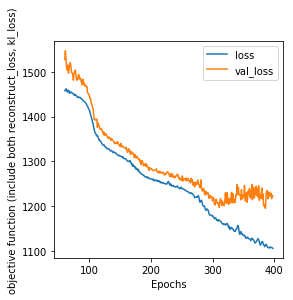

In [27]:
# Visualize training performance
history_df = pd.DataFrame(hist.history)
history_df = history_df.iloc[60:399]

hist_plot_file = "temp.pdf"#"(Lr_0.002)(NN6K_z100_a1.0_6L_0.1t)obj_func_per_dp(4cancers).pdf"#"temp.pdf"#
ax = history_df.plot()

ratio = 0.95
xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
# the abs method is used to make sure that all numbers are positive
# because x and y axis of an axes maybe inversed.
ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

ax.set_xlabel('Epochs')
ax.set_ylabel('objective function (include both reconstruct_loss, kl_loss)')
ax.set_title('')
fig = ax.get_figure()
#fig.savefig(hist_plot_file)

# Extract Encoder model

In [28]:
#extract the encoder part

# Model to compress input
#encoder = Model(rnaseq_input, [z_mean_encoded, z_log_var_encoded])
encoder = Model(rnaseq_input, z)
encoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 13854)        0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 6000)         83130000    input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 6000)         24000       dense_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 6000)         0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
dense_2 (D

In [29]:
encoder2 = Model(rnaseq_input, [z_mean_encoded, z_log_var_encoded])
encoder2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 13854)        0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 6000)         83130000    input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 6000)         24000       dense_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 6000)         0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
dense_2 (D

In [30]:
# Encode rnaseq into the hidden/latent representation - and save output
z_df = encoder.predict_on_batch(Exprframe_test)

z_df = pd.DataFrame(z_df, index=Exprframe_test.index)

z_df.columns.name = 'sample_id'
z_df.columns = z_df.columns + 1
z_df.head(10)

[z_mean_d, z_log_var_d]= encoder2.predict_on_batch(Exprframe_test)
z_mean_df = pd.DataFrame(z_mean_d, index=Exprframe_test.index)

z_mean_df.columns.name = 'sample_id'
z_mean_df.columns = z_mean_df.columns + 1


z_log_var_df = pd.DataFrame(z_log_var_d, index=Exprframe_test.index)

z_log_var_df.columns.name = 'sample_id'
z_log_var_df.columns = z_log_var_df.columns + 1

# Extract Decoder model

In [31]:
# build a generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim, ))  # can generate from any sampled z vector

_x_decoded_l5 = decoderl5_reconstruct(decoder_input)
_x_decoded_l4 = decoderl4_reconstruct(_x_decoded_l5)
_x_decoded_l3 = decoderl3_reconstruct(_x_decoded_l4)

_x_decoded_l2 = decoderl2_reconstruct(_x_decoded_l3)

_x_decoded_l1 = decoderl1_reconstruct(_x_decoded_l2)
_x_decoded_l0 = decoderl0_reconstruct(_x_decoded_l1)

decoder = Model(decoder_input, _x_decoded_l0)
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_9 (Dense)              (None, 500)               50500     
_________________________________________________________________
dense_10 (Dense)             (None, 1000)              501000    
_________________________________________________________________
dense_11 (Dense)             (None, 3000)              3003000   
_________________________________________________________________
dense_12 (Dense)             (None, 6000)              18006000  
_________________________________________________________________
dense_13 (Dense)             (None, 13854)             83137854  
Total para

## Observe reconstruction fidelity

In [35]:
#original input RNAseq data
rnaseq_df = Exprframe_test
rnaseq_df.head(3)

,ENSG00000000003.13,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,ENSG00000001460.16,...,ENSG00000280237.1,ENSG00000280411.1,ENSG00000280734.1,ENSG00000280789.1,ENSG00000280798.1,ENSG00000280832.1,ENSG00000281332.1,ENSG00000281398.1,ENSG00000281406.1,ENSG00000281649.1
TCGA-CK-6748-01A,0.749073,0.528939,0.205384,0.212993,0.416002,0.344308,0.399756,0.324282,0.210181,0.373076,...,0.260418,0.220510,0.463019,0.185867,0.208294,0.139837,0.250657,0.485760,0.558515,0.481088
TCGA-CM-4746-01A,0.675663,0.526757,0.222663,0.403797,0.164909,0.155398,0.472256,0.316475,0.197026,0.393945,...,0.314234,0.160185,0.485230,0.286112,0.044239,0.424512,0.107287,0.519237,0.584396,0.317193
TCGA-AA-3715-01A,0.383964,0.159524,0.203441,0.438150,0.626420,0.406272,0.285641,0.195765,0.193426,0.367600,...,0.338382,0.331248,0.443230,0.221247,0.145159,0.294008,0.146868,0.587215,0.440557,0.247084


In [36]:
# How well does the model reconstruct the input RNAseq data
input_rnaseq_reconstruct = decoder.predict(np.array(z_df))
input_rnaseq_reconstruct = pd.DataFrame(input_rnaseq_reconstruct, index=rnaseq_df.index,
                                        columns=rnaseq_df.columns)
input_rnaseq_reconstruct.head(3)

,ENSG00000000003.13,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,ENSG00000001460.16,...,ENSG00000280237.1,ENSG00000280411.1,ENSG00000280734.1,ENSG00000280789.1,ENSG00000280798.1,ENSG00000280832.1,ENSG00000281332.1,ENSG00000281398.1,ENSG00000281406.1,ENSG00000281649.1
TCGA-CK-6748-01A,0.627756,0.432015,0.238091,0.331282,0.318124,0.311138,0.428280,0.335754,0.197556,0.394898,...,0.328598,0.347013,0.393756,0.251954,0.246701,0.230663,0.283380,0.520145,0.560645,0.389924
TCGA-CM-4746-01A,0.593597,0.414874,0.215772,0.294531,0.377752,0.363745,0.434535,0.297979,0.180158,0.388663,...,0.345695,0.389951,0.382526,0.259242,0.260187,0.241139,0.279116,0.491955,0.587791,0.366305
TCGA-AA-3715-01A,0.533419,0.398167,0.273245,0.262009,0.542069,0.592807,0.441322,0.318524,0.192492,0.448426,...,0.412172,0.435786,0.406258,0.264669,0.342233,0.359938,0.330732,0.446624,0.624407,0.407076


In [37]:
#test the fidelity
reconstruction_fidelity = abs(rnaseq_df - input_rnaseq_reconstruct)

reconstruction_loss = reconstruction_fidelity.mean(axis = 1)

#print(reconstruction_loss)

gene_mean = reconstruction_fidelity.mean(axis=0)
gene_abssum = reconstruction_fidelity.abs().sum(axis=0).divide(rnaseq_df.shape[0])
gene_summary = pd.DataFrame([gene_mean, gene_abssum], index=['gene mean', 'gene abs(sum)']).T
#gene_summary.sort_values(by='gene abs(sum)', ascending=False).head(20)

# Print out the mean reconstruction loss and the mean KL loss

In [43]:
# L1 loss: losses.mean_absolute_error
reconstruction_loss_used = losses.mean_absolute_error(rnaseq_df, input_rnaseq_reconstruct) #* original_dim
with tf.Session() as sess:
    #print the reconstruction loss that we calculated
    mean_reconstruct_loss = sess.run(K.mean(reconstruction_loss_used))
    print ("The mean reconstruction loss for each data point is: %.11f" % mean_reconstruct_loss)

The mean reconstruction loss for each data point is: 0.08647466365


In [44]:
kl_loss = - 0.5 * K.sum(1 + z_log_var_d - K.square(z_mean_d) - 
                                K.exp(z_log_var_d), axis=-1) / latent_dim
with tf.Session() as sess:
    #print the kl loss that we calculated
    mean_kl_loss = sess.run(K.mean(kl_loss))
    print ("The mean KL loss for each data point is: %.11f" %mean_kl_loss)

The mean KL loss for each data point is: 0.21404279768


In [46]:
print ("The combined mean loss for each data point is: %.11f" % (mean_reconstruct_loss + alpha * mean_kl_loss))
print ("The current alpha choice for reconstruction loss + alpha*kl loss is: ", alpha)

The combined mean loss for each data point is: 0.30051746134
The current alpha choice for reconstruction loss + alpha*kl loss is:  1.0


In [ ]:
# Encode rnaseq into the hidden/latent representation - and save output
#encoded_rnaseq_df

z_df = encoder.predict_on_batch(Exprframe)

z_df = pd.DataFrame(z_df, index=Exprframe.index)

z_df.columns.name = 'sample_id'
z_df.columns = z_df.columns + 1
z_df.head(10)

encoded_file = "counts_data/vae_compressed/encoded_5cancers_rnaseq_vae(perSp,a1.0,unlabel,0.2_var,6LF6k,z50,minmax,ep700).tsv"
#encoded_file = "counts_data/vae_compressed/encoded_4_cancers_rnaseq_vae(perSp,a0,unlabel,0.2_var,3LF6k,z500,minmax).tsv"
z_df.to_csv(encoded_file, sep='\t')